In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Î¨∏Ï†ú 1
Ìò∏Ï£º Î©úÎ≤ÑÎ•∏Ïùò Ï£ºÌÉù Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ÏÖã melb_data.csvÏúºÎ°ú Ï£ºÌÉù Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÍ≥†,   
Í∞ÅÏ¢Ö ÌèâÍ∞ÄÏßÄÌëúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Ï†ïÌä∏Î¶¨ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÏÑ∏Ïöî.

#### Data Description 

* `Rooms`: Î∞© Í∞úÏàò

* `Price`: Í∞ÄÍ≤©(Îã®ÏúÑ: $ Îã¨Îü¨)

* `Type`: Ï£ºÌÉù Ïú†Ìòï   
br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

* `Distance`: Distance from CBD(Central Business District : ÎèÑÏã¨ ÏßÄÏó≠)

* `Bedroom2` : Scraped # of Bedrooms (from different source) (Ï£ºÏöî Ïπ®Ïã§ Í∞úÏàò)

* `Bathroom`: Number of Bathrooms

* `Car`: Number of carspots

* `Landsize`: Land Size

* `BuildingArea`: Building Size

* `CouncilArea`: Governing council for the area


Ïö∞ÏÑ† Îã§Ïùå ÏΩîÎìúÎì§ÏùÑ Ïã§ÌñâÌïòÏó¨ melb_dataÎ≥ÄÏàòÎ™ÖÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥†   
Í≤∞Ï†ïÌä∏Î¶¨ Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥† Í≤∞ÏÜêÍ∞íÏùÑ Ï≤òÎ¶¨Ìï©ÎãàÎã§.      
<span style='color:green'>(Î°úÏª¨ ÌôòÍ≤ΩÏóê ÏïåÎßûÍ≤å file_pathÎ•º Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî)</span>
      
* feature Îç∞Ïù¥ÌÑ∞ = [Rooms, Type, Distance, Bedroom2, Bathroom, Car, Landsize, BuildingArea, CouncilArea]   
* label Îç∞Ïù¥ÌÑ∞ = Price      
   
(Price Í∞íÏù¥ ÏñëÏ†Å ÏûêÎ£åÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Î∂ÑÎ•òÎ≥¥Îã® ÌöåÍ∑ÄÎ∞©ÏãùÏùò Î™®Îç∏Ïù¥ Îçî Ï†ÅÌï©ÌïòÏßÄÎßå, Í≤∞Ï†ïÌä∏Î¶¨Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ Ìé∏ÏùòÏÉÅ PriceÍ∞íÏùÑ ÏÇ¨Î∂ÑÏúÑÏàòÏóê Îî∞Îùº Î≤îÏ£ºÌòï ÏûêÎ£åÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.)

In [2]:
#(Î¨∏Ï†ú ÏïÑÎãò)
file_path = '../data/melb_data.csv'
drop_columns=['Date','YearBuilt','Suburb','SellerG','Postcode','Address','Method','Lattitude','Longtitude','Propertycount']
melb_data = pd.read_csv(file_path).drop(columns=drop_columns,axis=1)
melb_data['CouncilArea'] = melb_data['CouncilArea'].fillna('Moreland')
melb_data['BuildingArea'] = melb_data['BuildingArea'].fillna(melb_data['BuildingArea'].mean())
melb_data['Car'] = melb_data['Car'].fillna(melb_data['Car'].median())


KeyboardInterrupt



In [ ]:
melb_data.info()

LabelEncoderÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù∏ÏΩîÎî©ÏùÑ Ìï©ÎãàÎã§.

In [40]:
#(Î¨∏Ï†ú ÏïÑÎãò)
categorical_features = [ 'Type', 'CouncilArea','Regionname']
for col in categorical_features:
    le = LabelEncoder()
    melb_data[col] = le.fit_transform(melb_data[col])

### 1-1 (5Ï†ê) - Ï†ÑÏ≤òÎ¶¨
label Îç∞Ïù¥ÌÑ∞(target)Î°ú Price Î•º ÏÇ¨Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§.   
Í∑∏Îü¨ÎÇò ÏñëÏ†Å ÏûêÎ£åÏù∏ PriceÎ•º Í≤∞Ï†ïÌä∏Î¶¨Ïóê ÏïåÎßûÍ≤å Î≤îÏ£ºÌòï ÏûêÎ£åÎ°ú Î≥ÄÌòïÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Î∂ÑÏúÑÏàò(quartile)ÏôÄ 2Ï∞®ÏÑ∏ÏÖò Î≥µÏäµÍ≥ºÏ†ú Îïå ÌïôÏäµÌñàÎçò Tukey Fences Í∞úÎÖêÏùÑ ÌôúÏö©Ìï† Í≤ÉÏûÖÎãàÎã§.   
ÏïÑÎûò Í∑úÏπôÍ≥º Í∞ôÏù¥ PriceÍ∞íÏùÑ Î∞îÍæ∏ÏÑ∏Ïöî.
   
   <span style='color:red'>[ Í∑úÏπô ]</span>
* 0 Ïù¥ÏÉÅ, Q1 ÎØ∏Îßå : '0' 
* Q1 Ïù¥ÏÉÅ, Q2 ÎØ∏Îßå : '1' 
* Q2 Ïù¥ÏÉÅ, Q3 ÎØ∏Îßå : '2' 
* Q3 Ïù¥ÏÉÅ : '3' 
      
Îã§ÏùåÏùÄ Ïª§Ïä§ÌÖÄ Ìï®Ïàò price_to_level()ÏûÖÎãàÎã§. ÏúÑÏùò Í∑úÏπôÏóê ÎßûÍ≤å ÎπàÏπ∏ÏùÑ ÏïåÎßûÍ≤å Ï±ÑÏö∞ÏÑ∏Ïöî.   
   (Î¨∏Ï†úÏóê Ï†ÅÌûå ÎåÄÎ°ú Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§. ÏïÑÎûò Ìï®Ïàò Ï∂úÎ†• Í≤∞Í≥º(0 1 2 3)Í∞Ä ÏùºÏπòÌïòÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§.)

In [ ]:
def price_to_level(prices): # prices : pd.SeriesÍ∞ùÏ≤¥Î°ú Ï†ÑÎã¨Ìï¥Ï£ºÏÑ∏Ïöî
    # Î¨∏Ï†ú) ÏÇ¨Î∂ÑÏúÑÏàò(Q1,Q2,Q3) Íµ¨ÌïòÍ∏∞
    
    # Î¨∏Ï†ú) ÏúÑÏùò Í∑úÏπôÏóê ÎßûÍ≤å PriceÍ∞íÏóê Îî∞Îùº Î†àÎ≤®Î°ú Î≥ÄÌôòÌïòÎèÑÎ°ù ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî
    p_levels = []
    
    # Price_Level Îç∞Ïù¥ÌÑ∞Î•º Î∞òÌôòÌïòÏÑ∏Ïöî.
    return p_levels    

# price_to_level() Ïª§Ïä§ÌÖÄ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ PriceÏª¨ÎüºÍ∞íÏùÑ Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
melb_data['Price'] = price_to_level(melb_data['Price'])

# Î¨∏Ï†ú) Price Ïª¨ÎüºÎ™ÖÏùÑ PriceLevelÎ°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî. (ÌûåÌä∏: pandasÏùò rename() ÏÇ¨Ïö©)


ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÏù¥ Ï†úÎåÄÎ°ú Ïù¥Î£®Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

In [42]:
#(Î¨∏Ï†úÏïÑÎãò)
### Í∞ÑÎã®ÌïòÍ≤å price_to_level() Ïª§Ïä§ÌÖÄ Ìï®ÏàòÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî ###
print(melb_data.loc[8,'PriceLevel'],melb_data.loc[3,'PriceLevel'],
      melb_data.loc[1,'PriceLevel'],melb_data.loc[0,'PriceLevel'])
### Ï∂úÎ†• Í≤∞Í≥ºÍ∞Ä 0 1 2 3 Ïù¥Î©¥, Ïª§Ïä§ÌÖÄ Ìï®ÏàòÎ•º Ïò¨Î∞îÎ•¥Í≤å ÏûëÏÑ±Ìïú Í≤ÉÏûÖÎãàÎã§. ###

0 1 2 3


### 1-2 (5Ï†ê) - Ï†ïÌôïÎèÑ
melb_data Î•º train_test_split() Ìï®ÏàòÎ°ú ÌïôÏäµ/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ÌïòÍ≥†, Í∞ÑÎã®ÌïòÍ≤å DecisionTreeClassifier Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† PriceLevelÏùÑ ÏòàÏ∏°Ìï¥Î≥¥ÏÑ∏Ïöî. Í∑∏Î¶¨Í≥† ÏòàÏ∏° Í≤∞Í≥ºÏùò Ï†ïÌôïÎèÑ(accuracy)Î•º ÌèâÍ∞ÄÌï¥ÏÑú ÏÜåÏàòÏ†ê 5Î≤àÏß∏ ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶ºÌïòÏó¨ Ï∂úÎ†•Ìï¥Î≥¥ÏÑ∏Ïöî.   
<span style='color:green'>(DecisionTreeClassfier ÏÉùÏÑ±Ïûê Ìï®ÏàòÏôÄ train_test_splitÏùò random_state ÌååÎùºÎØ∏ÌÑ∞Í∞íÏùÄ Î™®Îëê 10ÏùÑ Ï†ÑÎã¨Ìï¥Ï£ºÏÑ∏Ïöî, test_sizeÎäî 0.25Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.)</span>
* features Îç∞Ïù¥ÌÑ∞ : PriceLevelÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº   
* label Îç∞Ïù¥ÌÑ∞ : PriceLevel Ïª¨Îüº

In [43]:
# features Î≥ÄÏàòÎ™ÖÏóê Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Î•º, label Î≥ÄÏàòÎ™ÖÏóê Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÍ≥†,
# train_test_split()ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.


# Í≤∞Ï†ïÌä∏Î¶¨ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥† ÌïôÏäµ, ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî. (ÏòàÏ∏°Í∞íÏùÄ 'pred' Î≥ÄÏàòÎ™ÖÏúºÎ°ú Ï†ÄÏû•ÌïòÏÑ∏Ïöî.)


# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ïÌôïÎèÑÎ°ú ÌèâÍ∞ÄÌïòÍ≥† ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º ÏúÑÏùò Ï°∞Í±¥ÎåÄÎ°ú Î∞òÏò¨Î¶ºÌïòÏó¨ Ï∂úÎ†•ÌïòÏÑ∏Ïöî


### 1-3 (40Ï†ê) - Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®
ÏúÑÏùò ÏòàÏ∏°Í∞í(pred)Í≥º Ïã§Ï†úÍ∞í(y_test)ÏùÑ ÌÜ†ÎåÄÎ°ú confusion matrixÎ•º Íµ¨ÌòÑÌï¥Î≥¥ÏÑ∏Ïöî.   (Îã§Ï§ë Î∂ÑÎ•òÏùº ÎïåÏùò confusion matrixÎ•º ÌïôÏäµÌï¥Î¥ÖÏãúÎã§)   
Îã§ÏùåÍ≥º Í∞ôÏùÄ Î™®ÏñëÏúºÎ°ú DataFrameÍ∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï¥ÏÑú Ï∂úÎ†•Ìï¥Î≥¥ÏÑ∏Ïöî.   
   (Í∞úÏàòÎäî Ìï¥Îãπ Í≤ΩÏö∞Ïùò ÏàòÎ•º ÏùòÎØ∏)
|          | 0 | 1 | 2 | 3 |
|----------|----------|----------|----------|----------|
| 0 | Í∞úÏàò | Í∞úÏàò |Í∞úÏàò  |Í∞úÏàò  |
| 1 | Í∞úÏàò | Í∞úÏàò | Í∞úÏàò | Í∞úÏàò |
| 2 | Í∞úÏàò | Í∞úÏàò | Í∞úÏàò | Í∞úÏàò |
| 3 | Í∞úÏàò | Í∞úÏàò | Í∞úÏàò | Í∞úÏàò |

**a)**
sklearn.metricsÏùò confusion_matrix() Ìï®ÏàòÎ°ú ÏÉùÏÑ±Ìïú Ïò§Ï∞®ÌñâÎ†¨ÏùÑ cm Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïòÍ≥†,
Ïù¥Î•º DataFrameÍ∞ùÏ≤¥Î°ú Î≥ÄÌôòÌï¥ ÏúÑÏùò ÏòàÏãúÏ≤òÎüº ÏòàÏÅòÍ≤å Ï∂úÎ†•ÌïòÏÑ∏Ïöî.   
**(5Ï†ê)**

In [ ]:
classes = ['0', '1', '2', '3'] # Î†àÏù¥Î∏î ÌÅ¥ÎûòÏä§
# Î≥ÄÏàò cmÏóê confusion_matrixÎ•º Ï†ÄÏû•ÌïòÏÑ∏Ïöî

# pandas DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏòàÏÅòÍ≤å Ï∂úÎ†•ÌïòÏÑ∏Ïöî


####  ÏßÅÏ†ë Ïû¨ÌòÑÏú®(recall)Í≥º Ï†ïÎ∞ÄÎèÑ(precision)Î•º Íµ¨Ìï¥ÏÑú ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî
ÌûåÌä∏: Îã§Ï§ëÎ∂ÑÎ•òÏùò confusion matrixÎ•º ÌïôÏäµÌïòÍ≥† macro-averagingÍ≥º micro-averagingÏùÑ ÌïôÏäµÌïòÏÑ∏Ïöî.

**b)** macro-averaging(macro-mean) Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ macro_precisionÍ≥º macro_recall Í∞íÏùÑ Íµ¨ÌïòÍ≥† Ï∂úÎ†•ÌïòÏÑ∏Ïöî.   
(Î∞òÎ≥µÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ìï¥Í≤∞ÌïòÏÑ∏Ïöî, Î≥ÄÏàòÎ™ÖÎèÑ Í∞ÅÍ∞Å macro_precisionÍ≥º macro_recallÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.)      
**(13Ï†ê)**

**c)** micro-averaging Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ micro_precisionÍ≥º micro_recall Í∞íÏùÑ Íµ¨ÌïòÍ≥† Ï∂úÎ†•ÌïòÏÑ∏Ïöî.   
(Î≥ÄÏàòÎ™ÖÎèÑ Í∞ÅÍ∞Å micro_precisionÍ≥º micro_recallÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.)   
(ÌûåÌä∏: ÏúÑÏùò Î∞òÎ≥µÎ¨∏ÏóêÏÑú ÎØ∏Î¶¨ TP,FP,FNÎì§ÏùÑ Ï†ÄÏû•ÌïòÎ©¥ Ïó¨Í∏∞ÏÑ† Í≥ÑÏÇ∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§.)   
**(13Ï†ê)**

**d)** sklearn.metricsÏùò classification_report() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Íµ¨Ìïú ÌèâÍ∞ÄÏßÄÌëú Í≤∞Í≥ºÎ•º clf_report Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïòÏÑ∏Ïöî  
Í∑∏Î¶¨Í≥† Ìï¥Îãπ Î≥ÄÏàòÎ•º DataFrame Í∞ùÏ≤¥Î°ú Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•ÌïòÏÑ∏Ïöî.   
(ÌûåÌä∏ : classification_report()Ìï®ÏàòÏùò ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ ÌïôÏäµÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í∞ùÏ≤¥Î°ú ÏâΩÍ≤å Î≥ÄÌôòÌïòÎäî Î∞©Î≤ïÏùÑ Ï∞æÏïÑÎ≥¥ÏÑ∏Ïöî)   
**(4Ï†ê)**

In [ ]:
# classification_reportÎ•º Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïòÍ≥† DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•ÌïòÏÑ∏Ïöî.


**e)** ÏúÑÏóêÏÑú ÏßÅÏ†ë Íµ¨Ìïú macro_precision, macro_recall, micro_precision, micro_recallÍ∞íÏù¥ clf_reportÏùò ÎÇ¥Ïö©Í≥º Í∞ôÏùÄÏßÄ ÏÜåÏàòÏ†ê 4Î≤àÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÎπÑÍµêÌïòÏó¨ Ï∂úÎ†•ÌïòÏÑ∏Ïöî.
* Ï∂úÎ†•Ïö© ÏΩîÎìú ÏòàÏãú   
<code>print('[Macro_P] my_score:{:.4f}, report_score:{:.4f}'.format(macro_precision,report_mac_precision))</code>   
<code>print('[Macro_R] my_score:{:.4f}, report_score:{:.4f}'.format(macro_recall,report_mac_recall))</code>   
<code>print('[Micro_P] my_score:{:.4f}, report_score:{:.4f}'.format(micro_precision,report_mic_precision))</code>   
<code>print('[Micro_R] my_score:{:.4f}, report_score:{:.4f}'.format(micro_recall,report_mic_recall))</code>
      
(ÌûåÌä∏: classification_reportÎ•º Ï∂úÎ†•Ìï¥Î≥¥Î©¥ micro averagingÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎã§! Í∑∏Îü¨ÎÇò micro averagingÏùò ÏàòÏãùÏùÑ Ïûò ÏÇ¥Ìé¥Î≥¥Î©¥ Ïñ¥Îñ§ ÌèâÍ∞ÄÏßÄÌëúÏôÄ ÏùòÎØ∏Í∞Ä Í∞ôÎã§Îäî ÏÇ¨Ïã§ÏùÑ Ïïå Ïàò ÏûàÎã§.)   
**(5Ï†ê)**

In [49]:
# ÏúÑÏùò Ï∂úÎ†• ÏΩîÎìú ÏòàÏãúÎ•º ÌôúÏö©Ìï¥ÏÑú Í∞Å ÌèâÍ∞Ä Í≤∞Í≥ºÍ∞íÎì§ÏùÑ ÎπÑÍµêÌïòÏó¨ Ï∂úÎ†•ÌïòÏÑ∏Ïöî


### Î¨∏Ï†ú2 (50Ï†ê)
ÏúÑÏä§ÏΩòÏã† Ïú†Î∞©Ïïî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Îäî Ï¢ÖÏñëÏùò ÌÅ¨Í∏∞, Î™®Ïñë Îì±Ïùò Îã§ÏñëÌïú ÏÜçÏÑ± Í∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï¥Îãπ Ï¢ÖÏñëÏù¥ ÏïÖÏÑ±Ïù∏ÏßÄ ÏñëÏÑ±Ïù∏ÏßÄÎ•º Î∂ÑÎ•òÌïú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏûÖÎãàÎã§. Ï¢ÖÏñëÏùò ÏñëÏÑ± Ïó¨Î∂ÄÎäî class Ïª¨ÎüºÏóêÏÑú ÌôïÏù∏Ìï† Ïàò ÏûàÏúºÎ©∞, ÏñëÏÑ±ÏùÄ 2, ÏïÖÏÑ±ÏùÄ 4Î°ú ÌëúÏãúÎêòÏñ¥ ÏûàÏäµÎãàÎã§.  

ÏïÑÎûòÏùò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score

2-1. *breast_cancer* Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂àÎü¨Ïò® ÌõÑ df Î≥ÄÏàòÏóê Ï†ÄÏû•Ìï¥Ï£ºÏÑ∏Ïöî. ÏÉÅÏúÑ 5Í∞úÏùò ÌñâÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎèÑÎ°ù Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.  **(3Ï†ê)**  
(Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï≤´ Î≤àÏß∏, Îëê Î≤àÏß∏ Ïó¥ÏùÑ ÏÇ≠Ï†úÌïú ÌõÑ, ÏïÑÎûòÏùò ÏÇ¨ÏßÑÍ≥º Í∞ôÏùÄ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎèÑÎ°ù Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.)
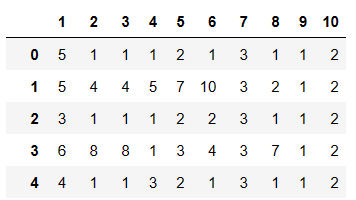

In [98]:
# df Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï≤´ Î≤àÏß∏, Îëê Î≤àÏß∏ Ïó¥ÏùÑ ÏÇ≠Ï†úÌï¥Ï£ºÏÑ∏Ïöî.


2-2. ÏïÑÎûòÏùò colums_name Î≥ÄÏàòÎ•º ÌôúÏö©ÌïòÏó¨ 0~10ÍπåÏßÄÏùò Ïà´ÏûêÎ°ú ÎêòÏñ¥ ÏûàÎäî Ïª¨ÎüºÎ™ÖÏùÑ Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî. **(3Ï†ê)**  
(Í∞ÅÍ∞ÅÏùò Ïª¨ÎüºÍ≥º columns_name Î≥ÄÏàò ÏïàÏùò Ïª¨ÎüºÎ™ÖÏùò ÏàúÏÑúÎäî ÎèôÏùºÌï©ÎãàÎã§. ÏïÑÎûòÏùò ÏÇ¨ÏßÑÍ≥º Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌòïÌÉúÎ•º Îùå Ïàò ÏûàÎèÑÎ°ù Ïª¨ÎüºÎ™ÖÏùÑ Î≥ÄÍ≤ΩÌï¥Ï£ºÏÑ∏Ïöî. ÏïÑÎûòÏùò columns_name Î≥ÄÏàòÎ•º Î≥µÏÇ¨Ìï¥ÏÑú ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.)

columns_name = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 
                'chromatin', 'normal_nucleoli', 'mitoses', 'class']
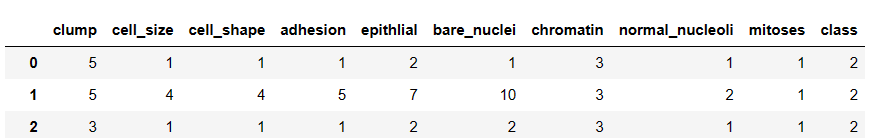

2-3. Îã§ÏùåÏùò ÏÑ§Î™ÖÏóê Îî∞Îùº Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌï¥Ï£ºÏÑ∏Ïöî. **(6Ï†ê)**

In [102]:
# infoÎ•º ÌôúÏö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.


In [104]:
# df Îç∞Ïù¥ÌÑ∞ Ï§ë bare_nuclei Ïª¨ÎüºÏùò Í∞í Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî. (value_counts ÌôúÏö©)


In [106]:
# 'bare_nuclei'Ïª¨ÎüºÏóê ÏûàÎäî Í∞í Ï§ë'?'Î•º 'bare_nuclei' Ïª¨ÎüºÏùò ÏµúÎπàÍ∞íÏúºÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî.


In [108]:
# 'bare_nuclei'Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Ïà´ÏûêÌòï(int)ÏúºÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî.


In [110]:
# ÏñëÏÑ±ÏùÄ 2, ÏïÖÏÑ±ÏùÄ 4Î°ú ÌëúÏãúÎêòÏñ¥ ÏûàÎäî df['class'] Í∞í Ï§ë 2(ÏñëÏÑ±)Îäî Ïà´Ïûê 0ÏúºÎ°ú, 4(ÏùåÏÑ±)Îäî Ïà´Ïûê 1Î°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî.


2-4. ÏïÑÎûòÏùò ÏÑ§Î™ÖÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï¥Ï£ºÏÑ∏Ïöî. **(3Ï†ê)**

In [112]:
# ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ x, Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ yÎ•º Ï∂îÏ∂úÌï¥Ï£ºÏÑ∏Ïöî. (Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞Îäî classÏª¨ÎüºÏóê Îã¥Í≤®ÏûàÏäµÎãàÎã§.)



2-5. StandardScalerÎ•º ÌôúÏö©ÌïòÏó¨ Í∞úÎ≥Ñ ÌîºÏ≤òÏùò ÌèâÍ∑†Ïù¥ 0Ïù¥Í≥†, Î∂ÑÏÇ∞Ïù¥ 1Ïù∏ Í∞íÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÏÑ∏Ïöî. ÎòêÌïú, Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º DataFrameÏúºÎ°ú Î≥ÄÌôòÌï¥ data_dfÎùºÎäî Î≥ÄÏàòÏóê Ï†ÄÏû•Ìï¥Ï£ºÏÑ∏Ïöî. data_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïª¨ÎüºÎ™ÖÏùÄ ÏïÑÎûòÏùò columns_name2 Î≥ÄÏàòÎ•º Í∑∏ÎåÄÎ°ú ÌôúÏö©ÌïòÏó¨ ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî. **(8Ï†ê)**  
columns_name2 = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 
                'chromatin', 'normal_nucleoli', 'mitoses']

(columns_name2 Î≥ÄÏàòÏóê Îã¥Í≤®ÏûàÎäî Ïª¨ÎüºÎ™ÖÏùò ÏàúÏÑúÏôÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í∞Å Ïó¥Ïùò ÏàúÏÑúÎäî ÎèôÏùºÌïòÍ∏∞ ÎïåÎ¨∏Ïóê columns_name2 Î≥ÄÏàòÎ•º ÏàòÏ†ïÌï† ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§.)

In [114]:
# StandardScaler Í∞ùÏ≤¥ ÏÉùÏÑ±

# StandardScalerÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î≥ÄÌôò. fit()Í≥º transform() Ìò∏Ï∂ú



In [116]:
# columns_name2 Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.


# data_df Î≥ÄÏàòÏóê Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ï†ÄÏû•Ìï¥Ï£ºÏÑ∏Ïöî.

# data_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÌïòÏúÑ 5Í∞ú ÌñâÏùÑ Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.


2-6. ÏïÑÎûòÏùò ÏÑ§Î™ÖÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï¥Ï£ºÏÑ∏Ïöî. **(4Ï†ê)**

In [118]:
# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎà†Ï£ºÏÑ∏Ïöî. (random_stateÎäî 11Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.)


In [120]:
# Î∂ÑÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÎ•º Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî. (shape ÌôúÏö©)


2-7. Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÌïôÏäµ, ÏòàÏ∏° Î∞è ÌèâÍ∞Ä ÏàòÌñâ **(13Ï†ê)**

In [122]:
# LogisticRegression Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî. Ìï¥Îãπ Í∞ùÏ≤¥Ïùò ÌååÎùºÎØ∏ÌÑ∞ Ï§ë solverÎäî 'liblinear'Î°ú ÏÑ§Ï†ïÌïòÍ≥† random_stateÎäî 11Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.

# LogisticRegression Í∞ùÏ≤¥Î•º ÌôúÏö©Ìïú ÌïôÏäµ

# LogisticRegression Í∞ùÏ≤¥Î•º ÌôúÏö©Ìïú ÏòàÏ∏° (LogisticRegression Í∞ùÏ≤¥Ïùò predict Î©îÏÑúÎìú ÌôúÏö©)


In [124]:
# pred_proba Î≥ÄÏàòÎ•º ÏÉùÏÑ±ÌïòÍ≥† Ïù¥ Î≥ÄÏàòÏóê ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†Í∞íÏùÑ Ï†ÄÏû•ÌïòÏÑ∏Ïöî. (LogisticRegression Í∞ùÏ≤¥Ïùò predict_proba() Î©îÏÑúÎìúÎ•º ÌôúÏö©)

# pred_proba_class1 Î≥ÄÏàòÎ•º ÎßåÎì§Í≥† Ïù¥ Î≥ÄÏàòÏóê Î†àÏù¥Î∏î Í∞íÏù¥ 1ÏùºÎïåÏùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï†ÄÏû•Ìï¥Ï£ºÏÑ∏Ïöî.(LogisticRegression Í∞ùÏ≤¥Ïùò predict_proba() Î©îÏÑúÎìúÎ•º ÌôúÏö©)



In [126]:
#roc_curve APIÎ•º Ïù¥Ïö©Ìï¥ ÏòàÏ∏° Î™®Îç∏Ïùò FPR, TPR, ÏûÑÍ≥ÑÍ∞íÏùÑ Íµ¨Ìï¥Ï£ºÏÑ∏Ïöî.


# Î∞òÌôòÎêú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥ÏóêÏÑú ÏÉòÌîåÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÎêò, ÏûÑÍ≥óÍ∞íÏùÑ 4 StepÏúºÎ°ú Ï∂îÏ∂úÌï¥Ï£ºÏÑ∏Ïöî. np.arangeÎäî 1Î∂ÄÌÑ∞ ÏãúÏûëÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.


# 'ÏÉòÌîå Ï∂îÏ∂úÏùÑ ÏúÑÌïú ÏûÑÍ≥óÍ∞í Î∞∞Ïó¥Ïùò index'Í≥º 'ÏÉòÌîå indexÎ°ú Ï∂îÏ∂úÌïú ÏûÑÍ≥óÍ∞í'ÏùÑ Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî. Í∞ÅÍ∞ÅÏùò Í∞íÏùÄ ÏÜåÏàòÏ†ê ÎÑ∑Ïß∏ ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶ºÌïòÏó¨ Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.



# 4 Step Îã®ÏúÑÎ°ú Ï∂îÏ∂úÎêú ÏûÑÍ≥óÍ∞íÏóê Îî∞Î•∏ FPR, TPR Í∞íÏùÑ Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî. Í∞ÅÍ∞ÅÏùò Í∞íÏùÄ ÏÜåÏàòÏ†ê ÎÑ∑Ïß∏ ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶ºÌïòÏó¨ Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.




In [128]:
# roc_auc_score APIÎ•º ÌôúÏö©ÌïòÏó¨ roc auc Í∞íÏùÑ Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.(ÏÜåÏàòÏ†ê ÎÑ∑Ïß∏ ÏûêÎ¶¨ÏóêÏÑú Î∞òÏò¨Î¶ºÌïòÏó¨ Ï∂úÎ†•)



2-8. Ïù¥Ï†Ñ Î¨∏Ï†úÏóêÏÑú LogisticRegression Í∞ùÏ≤¥Ïùò solver ÌååÎùºÎØ∏ÌÑ∞Î•º 'lbfgs'Î°úÎßå ÏÑ§Ï†ïÌñàÎçò Í≤ÉÍ≥º Îã¨Î¶¨ Ïù¥Î≤àÏóêÎäî ÏÑúÎ°ú Îã§Î•∏ solver Í∞íÏúºÎ°ú LogisticRegressionÏùÑ ÌïôÏäµÌï¥Î≥¥Í≥† ÏñªÏùÄ ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÎπÑÍµêÌï¥Î≥¥Î†§Í≥† Ìï©ÎãàÎã§. ÏïÑÎûòÏùò ÏΩîÎìúÎ•º ÏôÑÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.   **(10Ï†ê)**  
(ÏïÑÎûòÏùò ÏÇ¨ÏßÑÍ≥º Í∞ôÏùÄ ÌòïÌÉúÎ°ú Ï∂úÎ†•Îê† Ïàò ÏûàÎèÑÎ°ù ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.)

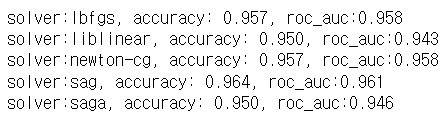  
(ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥ºÍ∞íÏùÄ ÏÇ¨ÏßÑ ÏÜç Í∞íÍ≥º Îã§Î•¥Í≤å ÎÇòÏò¨ Ïàò ÏûàÏäµÎãàÎã§.)

In [ ]:
solver_list = ['lbfgs','liblinear','newton-cg', 'sag', 'saga']

# solver_listÏóê Îã¥Í≤®ÏûàÎäî Í∞ÅÍ∞ÅÏùò solver Í∞íÏùÑ Ìïú Î≤àÏî© Ï†ÅÏö©ÌïòÏó¨ LogisticRegressionÏùÑ ÌïôÏäµÌïòÍ≥† ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï¥Ï£ºÏÑ∏Ïöî. (ÌûåÌä∏: for Íµ¨Î¨∏ ÌôúÏö©)
# Ï∂úÎ†• Í≤∞Í≥ºÏóêÏÑú 5Í∞ÄÏßÄ solver Í∞íÏóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ≥º Í≤∞Í≥ºÎ•º Í∞ÅÍ∞Å ÏñªÏùÑ Ïàò ÏûàÎèÑÎ°ù for Íµ¨Î¨∏ÏùÑ ÌôúÏö©ÌïòÏó¨ ÏΩîÎìúÎ•º ÏôÑÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
# LogisticRegression Í∞ùÏ≤¥Ïùò ÌååÎùºÎØ∏ÌÑ∞Îäî solver, max_iter, random_stateÎßå ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî. max_iterÎäî 300ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† random_stateÎäî 11Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.

#forÍµ¨Î¨∏ ÏûëÏÑ±

    # Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
    
    # fitÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµÌï¥Ï£ºÏÑ∏Ïöî.
    
    # ÏòàÏ∏°
    
    # accuracyÏôÄ roc_auc Ï∏°Ï†ï
    
    

--------

---

# 1. Í≤∞Ï†ï Ìä∏Î¶¨ ÌäπÏßï

### 1-0. ÏïôÏÉÅÎ∏îÏùÄ Î∞∞ÍπÖÍ≥º Î∂ÄÏä§ÌåÖ Î∞©ÏãùÏúºÎ°ú ÎÇòÎâ©ÎãàÎã§. Î∂ÄÏä§ÌåÖ Î∞©ÏãùÏùò ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë ÎëêÍ∞úÎ•º ÎßêÌï¥Î≥¥ÏÑ∏Ïöî. (5Ï†ê)

### 1-1. ÏïÑÎûò ÏÇ¨ÏßÑ ÏÜç Í≤∞Ï†ï Ìä∏Î¶¨Ïùò Î¶¨ÌîÑ ÎÖ∏ÎìúÎäî Î™áÍ∞úÏù∏Í∞ÄÏöî?  (5Ï†ê)

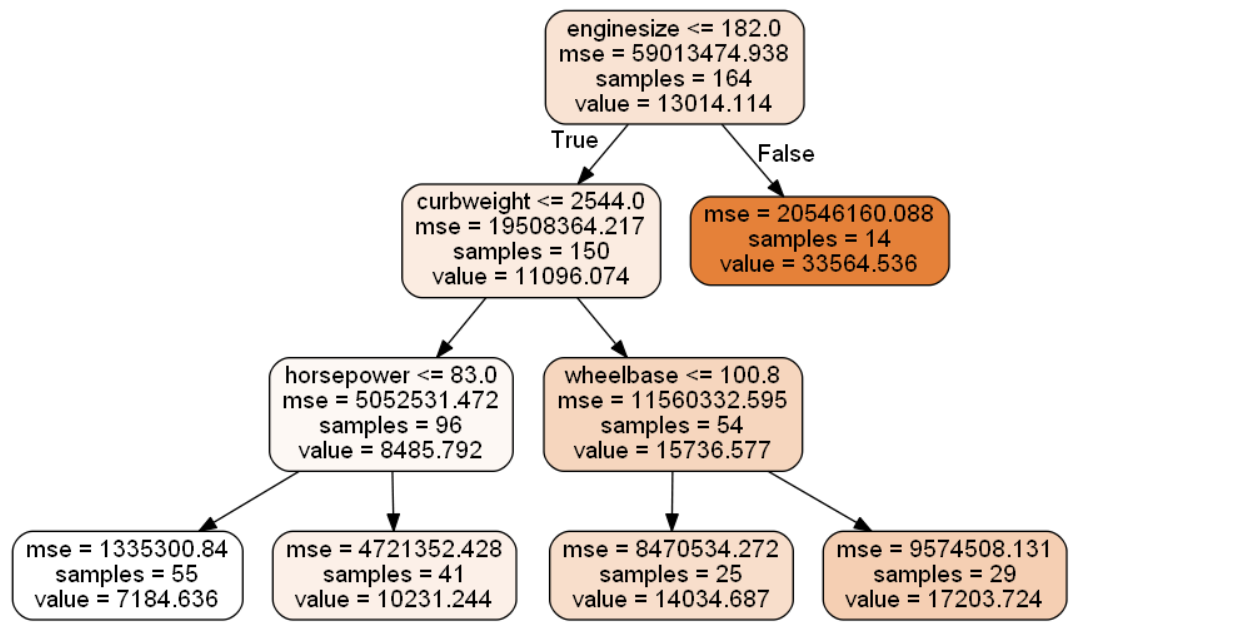

In [ ]:
from IPython.display import Image
Image("Î¶¨ÌîÑÎÖ∏Îìú Í∞úÏàò.png")

### 1-2. Í≤∞Ï†ï Ìä∏Î¶¨ Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ïßà Ïàò ÏûàÎäî Í∞ÄÏû• ÎåÄÌëúÏ†Å ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?  (10Ï†ê)

---

# 2. Í≤∞Ï†ï Ìä∏Î¶¨ ÌååÎùºÎØ∏ÌÑ∞

### 2-0. ÏïÑÎûòÏùò answer Î¶¨Ïä§Ìä∏Î•º Ïã§ÌñâÏãúÏºúÏ£ºÏÑ∏Ïöî. 2Î≤à Î¨∏Ï†úÏùò ÎãµÏïàÏù¥ Îã¥Í∏∏ Î¶¨Ïä§Ìä∏ÏûÖÎãàÎã§. ÏàúÏÑúÍ∞Ä Ï§ëÏöîÌïòÎãà Íº≠!! ÏàúÏÑúÎ•º ÏßÄÏºúÏ£ºÏÑ∏Ïöî :)  

In [ ]:
answer = []

#### üìå Î≥¥Í∏∞ <br><br> a = max_samples_split <br> b = min_samples_split <br> c = max_samples_leaf <br> d = min_samples_leaf <br> e = max_features <br> f = min_features <br> g = max_depth <br> h = min_depth <br> i = max_leaf_nodes <br> j = min_leaf_nodes

#### Îã§Ïùå Î¨∏Ï†úÎì§Ïùò ÎãµÏùÑ Î¶¨Ïä§Ìä∏Ïóê ÎÑ£ÏùÑ Îïå **answer.append()** Î•º ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî. Í∑∏Î†áÍ≤å Ìï¥Ïïº ÏàúÏÑúÍ∞Ä Îã¨ÎùºÏßÄÏßÄ ÏïäÏäµÎãàÎã§.<br> (Ïòà : answer.append('a')) <br><br>

### 2-1. Îã§ÏùåÏóê Ìï¥ÎãπÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïùò Î≥ÄÏàòÎ•º answerÎ¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.  (4Ï†ê)
<br><br> ‚òû Ìä∏Î¶¨Ïùò ÏµúÎåÄ ÍπäÏù¥Î•º Í∑úÏ†ïÌï©ÎãàÎã§. 
<br> ‚òû ÎîîÌè¥Ìä∏Îäî None. NoneÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ ÏôÑÎ≤ΩÌïòÍ≤å ÌÅ¥ÎûòÏä§ Í≤∞Ï†ï Í∞íÏù¥ Îê† ÎïåÍπåÏßÄ ÍπäÏù¥Î•º Í≥ÑÏÜç ÌÇ§Ïö∞Î©∞ Î∂ÑÌï†ÌïòÍ∏∞ÎèÑ ÌïúÎã§.

In [ ]:
# 2-1. Îãµ


### 2-2. Îã§ÏùåÏóê Ìï¥ÎãπÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïùò Î≥ÄÏàòÎ•º answerÎ¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî. (4Ï†ê)
<br><br> ‚òû Î∂ÑÌï†Ïù¥ Îê† Í≤ΩÏö∞ ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™ΩÏùò Î∏åÎûúÏπò ÎÖ∏ÎìúÏóêÏÑú Í∞ÄÏ†∏Ïïº Ìï† ÏµúÏÜåÌïúÏùò ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º ÎúªÌïúÎã§. 
<br> ‚òû ÌÅ∞ Í∞íÏúºÎ°ú ÏÑ§Ï†ïÎê†ÏàòÎ°ù, Î∂ÑÌï†Îê† Í≤ΩÏö∞ ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™ΩÏùò Î∏åÎûúÏπò ÎÖ∏ÎìúÏóêÏÑú Í∞ÄÏ†∏Ïïº Ìï† ÏµúÏÜåÌïúÏùò ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Ïàò Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÏãúÌÇ§Í∏∞Í∞Ä Ïñ¥Î†§Ïö∞ÎØÄÎ°ú ÎÖ∏Îìú Î∂ÑÌï†ÏùÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçú ÏàòÌñâÌïúÎã§.

In [ ]:
# 2-2. Îãµ


### 2-3. Îã§ÏùåÏóê Ìï¥ÎãπÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïùò Î≥ÄÏàòÎ•º answerÎ¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.  (4Ï†ê)
<br><br> ‚òû ÎÖ∏ÎìúÎ•¥Î•¥ Î∂ÑÌï†ÌïòÍ∏∞ ÏúÑÌïú ÏµúÏÜåÌïúÏùò ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏàòÎ°ú Í≥ºÏ†ÅÌï©ÏùÑ Ï†úÏñ¥ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêúÎã§. 
<br> ‚òû ÎîîÌè¥Ìä∏Îäî 2Ïù¥Í≥† ÏûëÍ≤å ÏÑ§Ï†ïÌï†ÏàòÎ°ù Î∂ÑÌï†ÎêòÎäî ÎÖ∏ÎìúÍ∞Ä ÎßéÏïÑÏ†∏ÏÑú Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±Ïù¥ Ï¶ùÍ∞ÄÌïúÎã§.

In [ ]:
# 2-3. Îãµ


### 2-4. Îã§ÏùåÏóê Ìï¥ÎãπÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïùò Î≥ÄÏàòÎ•º answerÎ¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.  (4Ï†ê)
<br><br> ‚òû ÎßêÎã® ÎÖ∏Îìú(Leaf)Ïùò ÏµúÎåÄ Í∞úÏàòÎ•º ÎúªÌïúÎã§. 

In [ ]:
# 2-4. Îãµ


### 2-5. Îã§ÏùåÏóê Ìï¥ÎãπÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïùò Î≥ÄÏàòÎ•º answerÎ¶¨Ïä§Ìä∏Ïóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.  (4Ï†ê)
<br><br> ‚òû ÏµúÏ†ÅÏùò Î∂ÑÌï†ÏùÑ ÏúÑÌï¥ Í≥†Î†§Ìï† ÏµúÎåÄ ÌîºÏ≤ò Í∞úÏàòÏù¥Îã§. ÎîîÌè¥Ìä∏Îäî NoneÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò Î™®Îì† ÌîºÏ≤òÎ•º ÏÇ¨Ïö©Ìï¥ Î∂ÑÌï† ÏàòÌñâÌïúÎã§. 
<br> ‚òû intÌòïÏúºÎ°ú ÏßÄÏ†ïÌïòÎ©¥ ÎåÄÏÉÅ ÌîºÏ≤òÏùò Í∞úÏàò, floatÌòïÏúºÎ°ú ÏßÄÏ†ïÌïòÎ©¥ Ï†ÑÏ≤¥ ÌîºÏ≤ò Ï§ë ÎåÄÏÉÅ ÌîºÏ≤òÏùò ÌçºÏÑºÌä∏Ïù¥Îã§.

In [ ]:
# 2-5. Îãµ


### 2Î≤à Î¨∏Ï†úÍ∞Ä Î™®Îëê ÎÅùÎÇ¨ÏäµÎãàÎã§. len(answer)ÏùÑ Ïã§ÌñâÌïòÏó¨ answerÏùò Í∏∏Ïù¥Í∞Ä 5Ïù∏ÏßÄ Îã§Ïãú ÌïúÎ≤à ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.

In [ ]:
print(len(answer))

0


---

# 3. Í≤∞Ï†ï Ìä∏Î¶¨ Î™®Îç∏Ïùò ÏãúÍ∞ÅÌôî

## ÎãπÏã†ÏùÄ Í≤∞Ï†ï Ìä∏Î¶¨ Î™®Îç∏Ïùò ÏãúÍ∞ÅÌôîÎ•º ÌïòÎ†§ÎäîÎç∞ ÌïúÍ∏Ä Íπ®Ïßê ÌòÑÏÉÅÏù¥ Î∞úÏÉùÌñàÏäµÎãàÎã§. ÏúÑÏôÄ Í∞ôÏùÄ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ≥†, Í≤∞Ï†ï Ìä∏Î¶¨ Î™®Îç∏ÏùÑ ÌïúÍ∏ÄÎ°ú ÏãúÍ∞ÅÌôî Ìï¥Î¥ÖÏãúÎã§.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.font_manager as fm

%matplotlib inline

# sklearnÏóê Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ ÏòµÎãàÎã§.
X, Y = load_iris(return_X_y = True)

# DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame(X, columns=['ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥','ÍΩÉÎ∞õÏπ® ÎÑìÏù¥', 'ÍΩÉÏûé Í∏∏Ïù¥', 'ÍΩÉÏûé ÎÑìÏù¥'])
df['ÌÅ¥ÎûòÏä§'] = Y

X = df.drop(columns=['ÌÅ¥ÎûòÏä§'])
Y = df['ÌÅ¥ÎûòÏä§']

## 3-1 Ïö∞ÏÑ† Í≤∞Ï†ïÌä∏Î¶¨ Î™®Îç∏ ÏãúÍ∞ÅÌôîÎ•º ÌïòÍ∏∞ ÏúÑÌïú ÏûëÏóÖÏùÑ Ìï¥Î¥ÖÏãúÎã§. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ìò∏Ï∂úÌïòÍ≥†, Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏôîÏäµÎãàÎã§. train_test_splitÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµÏö©, ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨Ìï¥ Î¥ÖÏãúÎã§. (random_state = 42, test_size = 0.2)  (5Ï†ê)

In [ ]:
# 3-1 Îãµ

## 3.2 DTmodelÏóê ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ Î™®Îç∏ÏùÑ Ï¥àÍ∏∞Ìôî ÌïòÍ≥† ÌïôÏäµÌï©ÎãàÎã§.  (5Ï†ê)

In [ ]:
#3-2 Îãµ

## 3.3 Ïù¥Ï†ú ÏãúÍ∞ÅÌôîÎ•º Ìï¥Î≥ºÍ≤ÅÎãàÎã§. ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ≥†, C:\Windows\Fonts Í≤ΩÎ°úÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏Î•º Ï∞æÏïÑ Ï†ÅÏö©Ìï¥Î¥ÖÏãúÎã§.  (10Ï†ê)

#### Mac OSÏù∏ Î∂ÑÎì§ÏùÄ ÌïúÍ∏ÄÏùÑ Ìè¨Ìï®ÌïòÏó¨ ÏãúÍ∞ÅÌôî ÏÑ±Í≥µÌï¥Ï£ºÏãúÎ©¥ Ï†ïÎãµÏûÖÎãàÎã§!

In [ ]:
import matplotlib.font_manager as fm
#ÏïÑÎûò ÏΩîÎìúÎäî C:\Windows\FontsÏóê ÎÇ¥Ïû•ÎêòÏñ¥ ÏûàÎäî Ìè∞Ìä∏Î•º Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôòÌï¥Ï£ºÎäî ÏΩîÎìúÏûÖÎãàÎã§.
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'cmex10',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'cmb10',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'cmtt10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmr10',
 'cmss10',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans',
 'Arial',
 'Pyunji R',
 'Snap ITC',
 'Segoe UI',
 'SimSun-ExtB',
 'Palace Script MT',
 'Wingdings 2',
 'Eras Bold ITC',
 'Yu Gothic',
 'Rockwell',
 'Georgia',
 'Bodoni MT',
 'Gill Sans MT',
 'Bodoni MT',
 'Verdana',
 'Leelawadee',
 'Sylfaen',
 'Berlin Sans FB',
 'Century',
 'Calibri',
 'Microsoft PhagsPa',
 'Consolas',
 'Arial',
 'Calisto M

In [ ]:
# 3-3 Îãµ None Í∞íÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.
# !!Hint!! 1Î≤àÏß∏ None Í∞íÏóê Ìè∞Ìä∏ Ïù¥Î¶ÑÏù¥ Îì§Ïñ¥Í∞ëÎãàÎã§. 

plt.rc('font', family=None)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(None, 
                   feature_names=['ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥','ÍΩÉÎ∞õÏπ® ÎÑìÏù¥', 'ÍΩÉÏûé Í∏∏Ïù¥', 'ÍΩÉÏûé ÎÑìÏù¥'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)


# 4. Í≤∞Ï†ïÌä∏Î¶¨ Í≥ºÏ†ÅÌï©(20Ï†ê)

### 4-1. make_classification() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ 2Í∞úÏùò ÌîºÏ≤òÍ∞Ä 4Í∞ÄÏßÄ Ïú†ÌòïÏùò ÌÅ¥ÎûòÏä§ Í∞íÏùÑ Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÎßåÎìúÏãúÏò§. (3Ï†ê) 

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 2Ï∞®Ïõê ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ÏÑú featureÎäî 2Í∞ú, Í≤∞Ï†ïÍ∞í ÌÅ¥ÎûòÏä§Îäî 4Í∞ÄÏßÄ Ïú†ÌòïÏùò classification ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±. 


### 4-2. plot ÌòïÌÉúÎ°ú 2Í∞úÏùò featureÎ°ú 2Ï∞®Ïõê Ï¢åÌëú ÏãúÍ∞ÅÌôîÌïòÍ≥† Í∞Å ÌÅ¥ÎûòÏä§Í∞íÏùÄ Îã§Î•∏ ÏÉâÍπîÎ°ú ÌëúÏãúÌïòÏó¨ Ï∂úÎ†•ÌïòÏãúÏò§. (4Ï†ê)


In [ ]:
# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî


### 4-3. ÏïÑÎûòÏùò ÏÖÄÏùÑ Ïã§ÌñâÏãúÌÇ§Í≥† visualize_boundary() Ìï®ÏàòÏùò Ïó≠Ìï† Î∞è Í∏∞Îä•ÏùÑ ÏÑ§Î™ÖÌïòÏãúÏò§. (3Ï†ê)

In [ ]:

import numpy as np

# ClassifierÏùò Decision BoundaryÎ•º ÏãúÍ∞ÅÌôî ÌïòÎäî Ìï®Ïàò
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # ÌïôÏäµ Îç∞Ïù¥ÌÉÄ scatter plotÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # Ìò∏Ï∂ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Îì§Ïñ¥Ïò® training Îç∞Ïù¥ÌÉÄÎ°ú model ÌïôÏäµ . 
    model.fit(X, y)
    # meshgrid ÌòïÌÉúÏù∏ Î™®Îì† Ï¢åÌëúÍ∞íÏúºÎ°ú ÏòàÏ∏° ÏàòÌñâ. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() Î•º Ïù¥Ïö©ÌïòÏó¨ class boundary Î•º visualization ÏàòÌñâ. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

Îãµ : 

### 4-4. ÌäπÏ†ïÌïú Ìä∏Î¶¨ ÏÉùÏÑ± Ï†úÏïΩÏù¥ ÏóÜÎäî Í≤∞Ï†ïÌä∏Î¶¨Ïùò ÌïôÏäµÏùÑ ÏãúÌÇ§Í≥† ÏúÑÏùò visalize_boundary()Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º ÏãúÍ∞ÅÌôî ÌïòÏãúÏò§. (3Ï†ê)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# ÌäπÏ†ïÌïú Ìä∏Î¶¨ ÏÉùÏÑ± Ï†úÏïΩÏóÜÎäî Í≤∞Ï†ï Ìä∏Î¶¨Ïùò Decsion Boundary ÏãúÍ∞ÅÌôî.


### 4-5. 7Í∞ú Ïù¥ÌïòÏù¥ Îç∞Ïù¥ÌÑ∞Îäî Î¶¨ÌîÑÎÖ∏ÎìúÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÎèÑÎ°ù Í∑úÏπôÏùÑ Î≥ÄÍ≤ΩÌïòÍ≥† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Î≥ÄÍ≤ΩÌï¥ Í≤∞Ï†ïÍ∏∞Ï§Ä Í≤ΩÍ≥ÑÍ∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥ÏãúÏò§. (3Ï†ê)

In [ ]:
# min_samples_leaf=6 ÏúºÎ°ú Ìä∏Î¶¨ ÏÉùÏÑ± Ï°∞Í±¥ÏùÑ Ï†úÏïΩÌïú Decision Boundary ÏãúÍ∞ÅÌôî



### 4-6. 4-4Ïùò Ï∂úÎ†•Í≤∞Í≥ºÏôÄ 4-5Ïùò Ï∂úÎ†•Í≤∞Í≥ºÎ•º Í≥ºÏ†ÅÌï© Ï∏°Î©¥ÏóêÏÑú ÎπÑÍµêÌïòÏó¨ ÏÑúÏà†ÌïòÏãúÏò§(4Ï†ê)

Îãµ :

# 5. Í≤∞Ï†ï Ìä∏Î¶¨ Ïã§Ïäµ

#### 5-1. penguins Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò§Í≥† Í∞ÑÎã®Ìïú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§. ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî! (3Ï†ê)

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd 

penguins= sns.load_dataset("penguins")

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
penguins["sex"] = penguins["sex"].replace(".",np.NaN)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
cols=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"] # Ïà´Ïûê Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº

#1. Ïà´ÏûêÎç∞Ïù¥ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïª¨Îüº Í≤∞Ï∏°Ïπò -> ÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
for i in range(len(cols)):
    penguins[cols[i]] = penguins[cols[i]].fillna(penguins[cols[i]].mean()) # ÌèâÍ∑†Í∞íÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥Îã§.

#2. Î¨∏Ïûê Îç∞Ïù¥ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïª¨Îüº Í≤∞Ï∏°Ïπò -> row Ï†úÍ±∞
penguins=penguins.dropna(subset=["sex"])


penguins.isna().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
#ÌîºÏ≤òÏôÄ Î†àÏù¥Î∏î Î∂ÑÎ¶¨

X = penguins.drop(["species"],axis=1)
y = penguins["species"]

#### 5-2. train_test_splitÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµÏÖãÍ≥º ÌÖåÏä§Ìä∏ÏÖãÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÏÑ∏Ïöî.(test Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®Ïù¥ 20%Í∞Ä ÎêòÍ≤å Î∂ÑÎ¶¨ Ìï¥Ï£ºÏÑ∏Ïöî) (3Ï†ê)

#### 5-3. Î¨∏ÏûêÎç∞Ïù¥ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïª¨ÎüºÏùÄ Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ, Ïà´ÏûêÎç∞Ïù¥ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïª¨ÎüºÏùÄ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§. ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÏãúÏºúÏ£ºÏÑ∏Ïöî. (3Ï†ê)

In [ ]:
cat_cols = ["island","sex"]
num_cols =["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
           
from sklearn.preprocessing import OneHotEncoder

oe=OneHotEncoder(sparse_output=False)
X_train_cat = oe.fit_transform(X_train[cat_cols])
X_test_cat = oe.fit_transform(X_test[cat_cols])

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaler = scaler.fit_transform(X_train[num_cols])
X_test_scaler = scaler.fit_transform(X_test[num_cols])

# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ìïú Í≤∞Í≥ºÏôÄ Ïä§ÏºÄÏùºÎßÅÌïú Í≤∞Í≥º Ìï©ÏπòÍ∏∞
X_train_s=np.concatenate((X_train_cat,X_train_scaler),axis=1)
X_test_s=np.concatenate((X_test_cat,X_test_scaler),axis=1)

# y_trainÏùÄ Î¨∏ÏûêÏó¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥Ï§çÎãàÎã§.
from sklearn.preprocessing import LabelEncoder

e=LabelEncoder()
y_train=e.fit_transform(y_train)
y_test=e.fit_transform(y_test)

#### 5-4. Ïù¥Ï†ú decisiontreeÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµÏãúÏºúÏ£ºÍ≤†ÏäµÎãàÎã§. Î®ºÏ†Ä decisiontressClassifierÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îäî Î™®Îëê ÎîîÌè¥Ìä∏ Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌï¥ ÏàòÌñâÌïòÍ≥†, Ï†ïÌôïÎèÑÎ•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî. (random_stateÎäî 156ÏúºÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.) (4Ï†ê)

#### 5-5. Ïù¥Î≤àÏóêÎäî Í≤∞Ï†ï Ìä∏Î¶¨Ïùò Ìä∏Î¶¨ ÍπäÏù¥ÏôÄ min_samples_leafÍ∞Ä ÏòàÏ∏° Ï†ïÌôïÎèÑÏóê Ï£ºÎäî ÏòÅÌñ•ÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§. (GridSearchCV ÏÇ¨Ïö©)  max_depthÏôÄ min_samples_leafÎäî ÏûêÏú†Î°≠Í≤å ÏÑ§Ï†ïÌï¥Ï£ºÏãúÍ≥†, scoringÏùÄ accuracy, cvÎäî 5Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî. Ïù¥ÌõÑ GridSearchCV ÏµúÍ≥† ÌèâÍ∑† Ï†ïÌôïÎèÑ ÏàòÏπòÏôÄ ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî. (3Ï†ê)

In [ ]:
from sklearn.model_selection import GridSearchCV

params=

#### 5-6. ÎßàÏßÄÎßâÏúºÎ°ú Î≥ÑÎèÑÏùò ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Í≤∞Ï†ï Ìä∏Î¶¨Ïùò Ï†ïÌôïÎèÑÎ•º Ï∏°Ï†ïÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. max_depthÎäî 3ÏúºÎ°ú Í≥†Ï†ïÌïòÍ≥†,min_samples_leafÎ•º ÏûêÏú†Î°≠Í≤å Î≥ÄÍ≤ΩÌïòÎ©∞ Î≥ÄÌôîÏóê Îî∞Î•∏ Í∞íÏùÑ Ï∏°Ï†ïÌï¥Ï£ºÏÑ∏Ïöî. (4Ï†ê)

In [ ]:
min_samples_leaf=

#min_samples_leaf Í∞íÏùÑ Î≥ÄÌôîÏãúÌÇ§Î©∞ Í∑∏ÎïåÎßàÎã§ ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑúÏùò ÏòàÏ∏° ÏÑ±Îä• Ï∏°Ï†ï
